# INTRODUCTION
Sentiment analysis is the method of determining if a text has a positive or negative sentiment. One of the most intriguing applications of NLP is this. By analyzing the words in a sentence, you can use NLP(Natural Language Processing) to determine whether it is positive, negative, or neutral comments.Here we are determing the positive,negative or neutral comments made by the people in the given dataset. The dataset we have taken is twitter-entity-sentiment-analysis that is available in kaggle. To do this, first we have to import all the libraries required.  

# Importing Libraries as needed

In [1]:
import numpy as np
import pandas as pd
import time 
import re

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
english_stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)


In [2]:
headers=['Tweet_ID','Entity','Sentiment','Tweet_content']


t_df=pd.read_csv('../input/twitter-entity-sentiment-analysis/twitter_training.csv', sep=',', names=headers)

v_df=pd.read_csv('../input/twitter-entity-sentiment-analysis/twitter_validation.csv', sep=',', names=headers)

# Exploratory Data Analysis

In [3]:
t_df.sample(5)

,Tweet_ID,Entity,Sentiment,Tweet_content
43387,10247,PlayerUnknownsBattlegrounds(PUBG),Irrelevant,PUBG fans take funeral procession for banned g...
9983,12918,Xbox(Xseries),Positive,The whole video sounds fucking stupid but 1:35...
46001,11895,Verizon,Neutral,Verizon told to stop making its 5G claims by a...
35590,8111,Microsoft,Negative,@Microsoft @PlayStation at some point in my li...
26316,920,AssassinsCreed,Irrelevant,"Tried doing Assassin's Creed outfits, failed m..."


In [4]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
t_df['Sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

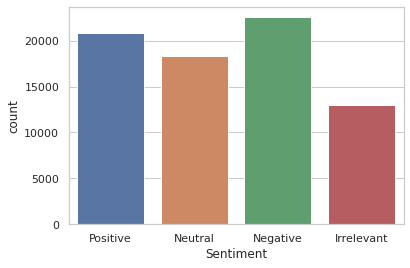

In [6]:
sns.countplot(x=t_df['Sentiment'])

In [7]:
t_df.duplicated().sum()

2700

In [8]:
t_df= t_df.drop_duplicates()

<AxesSubplot:ylabel='Sentiment'>

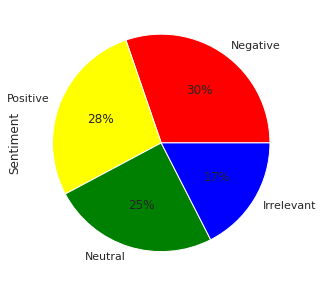

In [9]:
t_df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(5,5),colors=["red", "yellow", "green",'blue'])


<AxesSubplot:xlabel='Entity'>

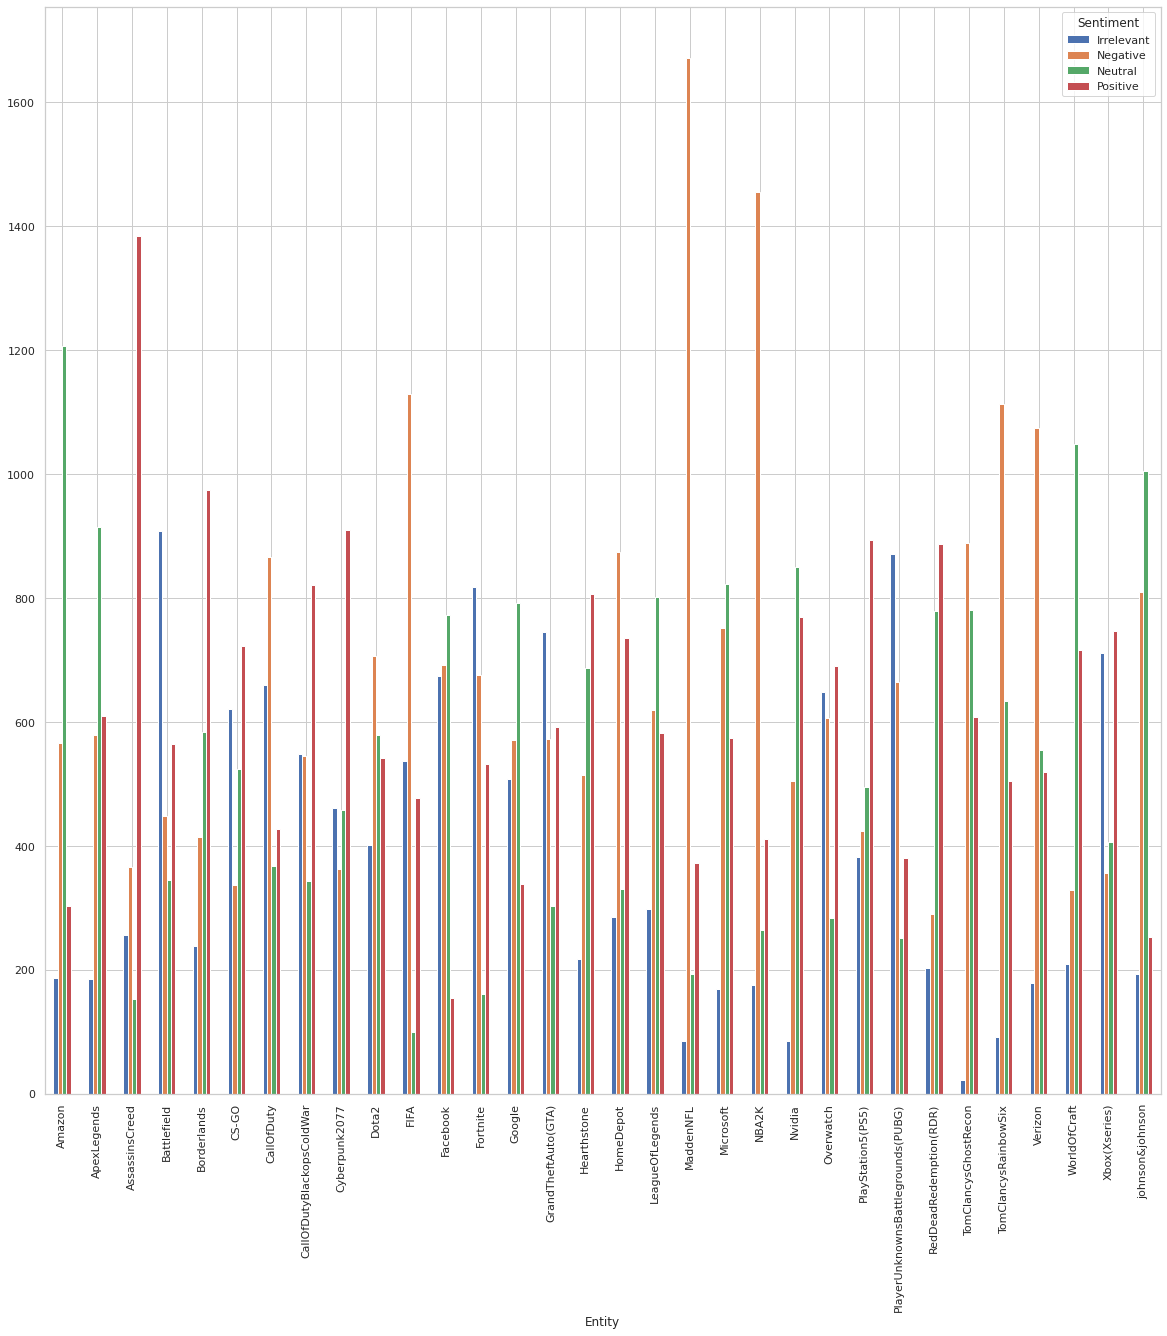

In [10]:
Twitter_sentiment = t_df.groupby(['Entity', 'Sentiment']).Sentiment.count().unstack()
Twitter_sentiment.plot(kind='bar',figsize=(20,20))